In [1]:
import numpy as np
import matplotlib.pyplot as plt

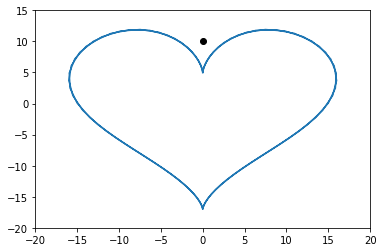

In [13]:
ax = plt.figure().add_subplot()

# Prepare arrays x, y, z
theta = np.linspace(-2 * np.pi, 2 * np.pi, 100)
x = 16 * np.sin(theta)**3
y = 13 * np.cos(theta) - 5*np.cos(2*theta) -2*np.cos(3*theta) - np.cos(4*theta)

ax.plot(x, y)
ax.scatter(0,10,c='black')
plt.xlim([-20,20])
plt.ylim([-20,15])


plt.show()

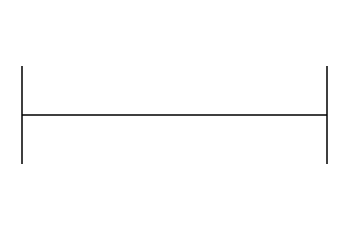

In [21]:
plt.figure()
a = [0,1]
plt.hlines(1,0,1,colors='black')  # Draw a horizontal line
plt.eventplot(a, orientation='horizontal', colors='black')
plt.axis('off')
plt.show()

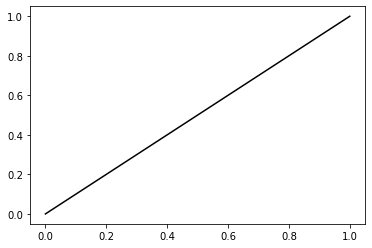

In [24]:
plt.plot([0,1],[0,1],color = 'black')

In [26]:
from mpl_toolkits.mplot3d import Axes3D

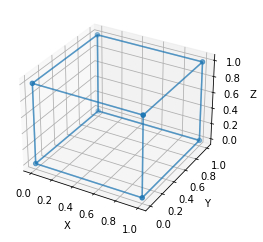

In [37]:
points = np.array([[0, 0, 0],
                      [1, 0, 0 ],
                      [1, 1, 0],
                      [0, 1, 0],
                      [0, 0, 1],
                      [1, 0, 1 ],
                      [1, 1, 1],
                      [0, 1, 1]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
r = [0,1]
X, Y = np.meshgrid(r, r)
zero = np.zeros(4).reshape(2,2)
ax.plot_wireframe(X,Y,one, alpha=0.5)
ax.plot_wireframe(X,Y,zero, alpha=0.5)
ax.plot_wireframe(X,zero,Y, alpha=0.5)
ax.plot_wireframe(X,one,Y, alpha=0.5)
ax.plot_wireframe(one,X,Y, alpha=0.5)
ax.plot_wireframe(zero,X,Y, alpha=0.5)
ax.scatter3D(points[:, 0], points[:, 1], points[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# 準備步驟

首先先生成講解用的圖

In [3]:
from sklearn.datasets import make_blobs
import numpy as np

In [6]:
import matplotlib.pyplot as plt

Generate isotropic Gaussian blobs for clustering.

In [4]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

#生成5個blob，給出各自的質心跟標準差

In [5]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)
# X: The generated samples.
# y: 每個sample對應的label

In [7]:
#定義畫圖函數
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1) 
    #X 的所有x座標，X的所有y座標，顏色用y(y=None代表函數不再給定y，使用make_blob那邊的y)，s表示圖案的大小
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

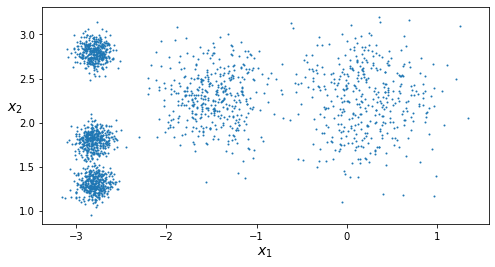

In [9]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

接著我們做k-means

In [10]:
from sklearn.cluster import KMeans

因為現在的資料視覺化之後很明顯應該分成5個群，所以我們先暫時設定群組數量為5<br>
等等再來看一般情況應該怎麼設定群組數量

In [11]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)

In [12]:
y_pred = kmeans.fit_predict(X)

In [13]:
kmeans.labels_ == y_pred

array([ True,  True,  True, ...,  True,  True,  True])

給出新的資料，使用訓練好的模型來分群

In [14]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

來把剛剛分群的結果畫出來

In [15]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2) # k代表black .表示圖案用「dot」呈現

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'): #w代表white
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9) 
    # zorder 用來控制哪個圖案在上面，值越大就會在越上層
    # alpha： blending value, between 0 (transparent) and 1 (opaque).
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

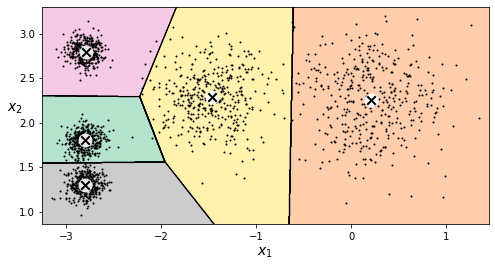

In [16]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

# K-means 演算法

作法如下：

1. 隨機選k個點當作群組的質心
2. 把每個資料分到最靠近的質心
3. 重新計算群組的質心

之後就是2.3步重複執行直到收斂

註記：scikit-learn的kmeans已經對於演算法做過優化，並且預設使用優化後算法，並非原先的理論。

例如：第1步之選取質心方法使用k-means++方法。

以下為了教學用途，使用非預設之原本理論的做法 i.e. init='random'

In [17]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, random_state=0)

畫出結果 (左圖初始為第1步，之後為第2步，右圖為第3步，row代表迭代訓練次數)

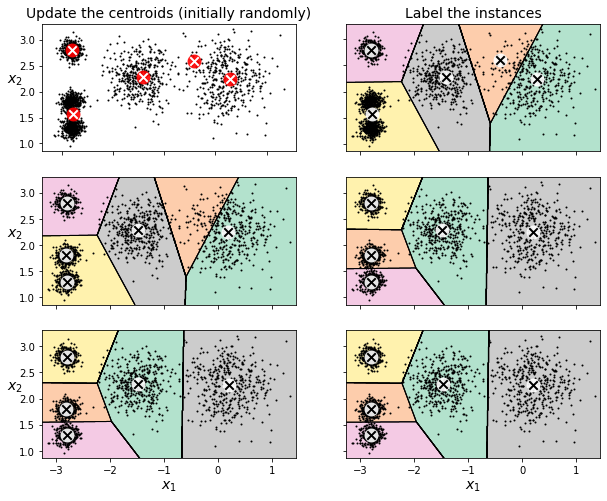

In [18]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

# K-means的潛在問題

由於質心是隨機選的，代表如果seed設定不一樣的話，每次選的質心都不一樣，也會使得每次訓練出來的分群結果都不同。

In [22]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

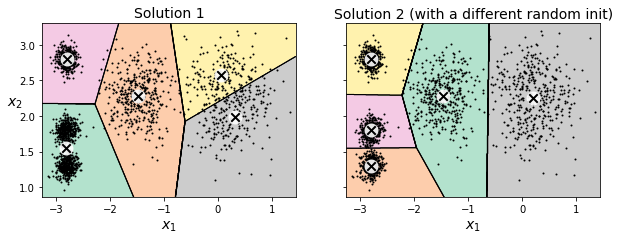

In [23]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                          random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                          random_state=5)

#兩個模型只差在random_state的設定不一樣

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

但是在簡單的資料集上，增加迭代次數可以讓不同模型的結果變得差不多

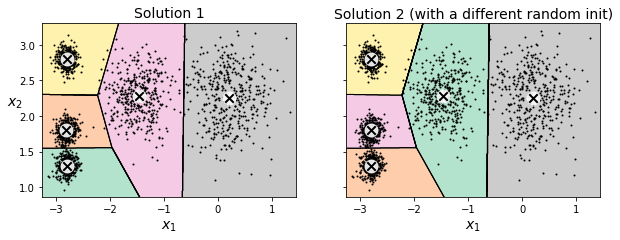

In [24]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=10,
                          random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                          random_state=5)

#兩個模型只差在random_state的設定不一樣

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

# 判斷模型訓練的基準

因為分群方法是「非監督式學習」，所以我們不能用預測的結果跟實際結果去評斷模型。但是我們能夠取出

$$ \min\sum\limits_{i=1}^{n} 1_{\{x_i\in C_k\}}\lVert x_i-\mu_k\rVert^2$$

的模型。
其中 $C_k$: 表示第k個群組的所有點， $\mu_k$: 第k個群組的質心

此公式可視為物理學的inertia(轉動慣量)，而我們希望好的模型能有越小的inertia


In [25]:
kmeans.inertia_

211.5985372581684

也可用以下函數取出

In [27]:
kmeans.score(X) #因為scikit-learn的score函數秉持「分數越高越好」的特性，所以inertia會用負的表示。

-211.5985372581684

# 改善模型的方法

除了剛剛看到的增加訓練迭代的次數以外，以下介紹先前提到的k-means++方法

1. 透過均勻分布選取一個資料點當作質心 $\mu_1$。
2. 以下列方法當作機率去選擇第二個質心 $\mu_2$

$$ P(x_i = \mu_2) = \frac{dist(x_i,\mu_{j_i})}{\sum\limits_{i=1}^{n}dist(x_i,\mu_{j_i})} $$
其中 $j_i$ is the number s.t. $x_i-\mu_{j_i} = \min\limits_{m=1,2}\{x_i-\mu_m\}$

3. 以第2步之精神，選擇下一個質心，直到選出k個質心為止
4. 已初始完質心，接回k-means的分群分法

# 此方法之精神

第二步：計算每個點與最近的質心之距離。觀察分子部分，可以看到$\textbf{資料點與每個質心都很遠的話，值很大}$。<br>
代表下一個質心傾向$\textbf{選擇離前面選出之質心有點距離的資料}$ 當作另一個群組的質心

scikit-learn 的kmeans預設使用此種初始化質心之方法。<br>
也就是 `init` 參數不需要特別設定

# 如何決定該分幾群?

依舊使用上述之範例資料，來看如果分成3群 跟8群會有什麼結果

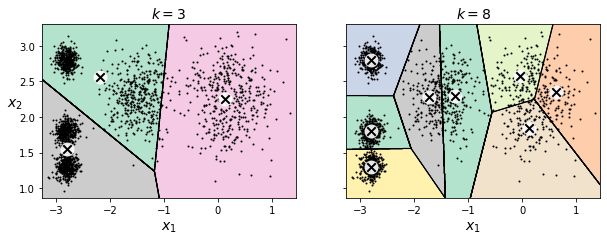

In [28]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

In [29]:
kmeans_k3.inertia_

653.2167190021553

In [30]:
kmeans_k8.inertia_

119.11983416102878

剛剛提到可以用inertia當作模型的判斷依據，但這邊可以看出來分成8群的inertia是比較低的，分群結果看起來卻不是很好。

這個現象可以從inertia的公式看出：分的群越多，inertia可以越低，如下圖。

In [31]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

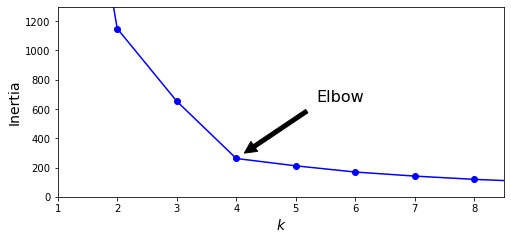

In [32]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

inertia可以作為快速的判斷分群數量的基準，但是會比較粗糙。

# 另一種精確的方法

如果我們能花更多計算資源的話，可以考慮用 `silhouette score`(輪廓分數)

輪廓分數計算兩個變數：

1. a : The mean distance between a sample and all other points in the same class.
2. b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient s for a single sample is then given as:

$$ \frac{b-a}{max(a,b)} \in [-1,1]$$

# 輪廓分數的解釋

1. 越靠近-1表示資料沒有被分類到正確的群組 ;越靠近+1表示資料在正確群組且離下一個群組有段距離 ; 越靠近0表示在兩群組的邊界

2. 分數越高表示群組越密集，且群組越分散，符合我們對於不同群組之間的想像。

In [33]:
from sklearn.metrics import silhouette_score

In [34]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

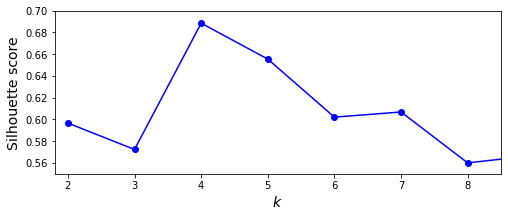

In [35]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

我們可以看出，在範例資料當中，選用4個群組的inertia最低，輪廓分數最高。而5個群組則是有次佳的結果

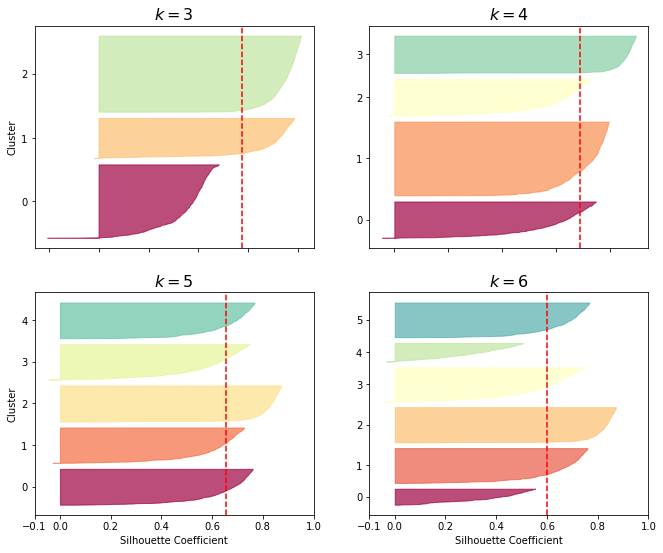

In [37]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

如果我們細看每個群組的輪廓分數，以紅虛線表示整體的輪廓分數。超過虛線表示且值越大，代表分群的結果好。

底部寬度代表了群組的資料多寡，越寬代表越多。

以此範例來看，使用4群跟5群都是不錯的選擇，但5群能分出更小的群組是可以考慮的因素之一。

# k-means的限制

1. k-means必須迭代多次來避免得到不好的解
2. 儘管能透過inertia或是輪廓分數輔助判斷，但k-means仍必須主觀給定分群數量
3. 若群組大小不一致，或是密度不同，或是不是球形，k-means可能表現不好。

In [38]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

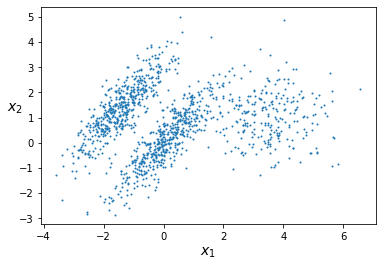

In [39]:
plot_clusters(X)

In [40]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

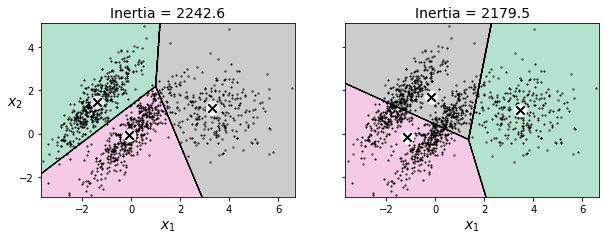

In [41]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

左圖看起來分的還行，但也不是很OK。<br>
右圖則是完全不能用。

因應此情況，可選擇使用高斯混合模型來處理。(後續課程)

此章節程式節錄自：https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb